* **Business:** Technical Trainings(Data Science- AI ,Full Stack,AWS Devops),Placement & Services.
* **Goal:** Business Competitors Study(In Hyderabad and Bangalore)
* **Skill:** EDA

**EDA**
* EDA is the process of data understanding on Validated data
* In statistics, Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

* EDA will follow two concepts, 
    - Stats
        - Descriptive
    - Visual Analysis

**Table of Contents**
* **0.Data**
* **1.Data Validation and Normalization**
* **2.EDA**
    * **2.1 Types of Variables/Columns**
    * **2.2 Analysis**
        * **2.2.1 Uni-Variate Analysis**
        * **2.2.2 Bi-Variate Analysis**
        * **2.2.3 Multi-Variate Analysis**
    * **Insights**  

**0.Data**

In [5]:
# Base libraries

import pandas as pd
import numpy as np

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

* Collected dataset manually by utilizing different resources

In [7]:
# Data Loading

raw = pd.read_excel("ProjectDataset1.xlsx")

                                                                    Basic Checks

In [9]:
raw.shape

(217, 11)

In [10]:
raw.columns

Index(['InstituteName', 'Location', 'CourseName', 'CourseFee',
       'ModeOfTraining', 'Certification', 'InternshipIncluded',
       'PlacementAssistance', 'NoOfStudents', 'Rating', 'Discounts'],
      dtype='object')

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   InstituteName        217 non-null    object 
 1   Location             217 non-null    object 
 2   CourseName           217 non-null    object 
 3   CourseFee            138 non-null    object 
 4   ModeOfTraining       217 non-null    object 
 5   Certification        217 non-null    object 
 6   InternshipIncluded   217 non-null    object 
 7   PlacementAssistance  217 non-null    object 
 8   NoOfStudents         131 non-null    float64
 9   Rating               217 non-null    float64
 10  Discounts            217 non-null    object 
dtypes: float64(2), object(9)
memory usage: 18.8+ KB


In [12]:
raw.head()

,InstituteName,Location,CourseName,CourseFee,ModeOfTraining,Certification,InternshipIncluded,PlacementAssistance,NoOfStudents,Rating,Discounts
0,Besant Technologies,Bangalore,DataScience,35000,Online&Offline,Yes,No,Yes,2245.0,4.0,No
1,Besant Technologies,Bangalore,Python FullStack,40200,Online&Offline,Yes,No,Yes,2245.0,4.0,No
2,Besant Technologies,Bangalore,Java FullStack,40200,Online&Offline,Yes,No,Yes,2245.0,4.0,No
3,Besant Technologies,Bangalore,AWSDevops,62000,Online&Offline,Yes,No,Yes,2500.0,4.0,No
4,Besant Technologies,Bangalore,DigitalMarketing,15000,Online&Offline,Yes,No,Yes,NaN,4.0,No


                                                                     Column  Info

ColumnName| Description
----------|--------------
Institute Name | Name of the training institute.
Location | City where the institute is located.
Course Name |  Name of the course provided by the institute.
Course Fee | Fee for the course.
Mode of Training | The format in which the course is offered(Online / Offline).
Certification | Indicates whether a certification is provided upon completion(Yes/No).
Internship Included | Specifies if the course includes an internship opportunity(Yes/No).
Placement Assistance | States whether the institute provides job placement support after course completion(Yes/No).
No. of Students | The number of students enrolled in the course.
Rating | The overall rating of the course based on student feedback(Out of 5).
Discounts | Indicates if any discounts are offered on the course fee(Yes/No).

**1.Data Validation**

* Checking and validating each & every column data along with data type of column
* Duplicated Rows Handling
    - Checking and droping duplicated rows to overcome data leakage

**Column Data Validation**

In [18]:
# Taking a function for col data verification

def colcheck(df, col):
    print("Column: ", col)
    print()
    print(f"Number of Unique Values in Column: {df[col].nunique()}")
    print()
    print("Unique Values in Column:")
    print(df[col].unique())
    print()
    print("Data Type of Column:", df[col].dtype)
    print()
    print("***********************************************************")
    print()

* **Applying above function to each & every column**

In [20]:
for col in raw.columns:
    colcheck(raw, col)

Column:  InstituteName

Number of Unique Values in Column: 60

Unique Values in Column:
['Besant Technologies' 'Upshot Tecnologies' 'Cloud Synergy'
 'TechStack Academy' 'ACTE' 'GetinTechnologies' 'FITA Academy'
 'Achievers It Solutions' 'SDLC' 'Kodnest' 'Inventateq' 'TIB Academy '
 'Codemithra' 'Apponix' 'Ria Institute Of Technology' '360DigiTMG'
 'Excelr' 'MNP Technologies' 'VersionIT' 'Digital Edify' 'Vcubes'
 'Codegnan ' 'Nexon IT Academy ' 'Tronix Technologies ' 'Level Up '
 'Innomatics Research Labs ' 'XtremeTech' 'Vagdevi Technologies'
 'Cloud Vision Technologies ' '360 DigiTMG' 'Srish Technologies '
 'Datamites' 'Social Prachaar ' 'Naresh i Technogies' 'ExcelR'
 'Imarticus Learning' 'Sipnatech' 'Datahill Solutions'
 'Aditi Digital Solutions' 'Digital Nest' 'OdinSchool' 'Learnbay'
 'Algorithm by IITian' 'Simplilearn' 'Jupiter Technologies' 'AlmaBetter'
 'Akshara' 'Learn More Technologies' 'Cambridge Infotech' 'Infocampus'
 'VTHREESOFT Technologies' 'Xpresdata Software Academy'
 '

 * Need to handle data in InstituteName,coursename,coursefee,modeoftraining,certification,internshipincluded,placementAssistance,discounts columns. 

                                                                        Institute Name

In [23]:
colcheck(raw,'InstituteName')

Column:  InstituteName

Number of Unique Values in Column: 60

Unique Values in Column:
['Besant Technologies' 'Upshot Tecnologies' 'Cloud Synergy'
 'TechStack Academy' 'ACTE' 'GetinTechnologies' 'FITA Academy'
 'Achievers It Solutions' 'SDLC' 'Kodnest' 'Inventateq' 'TIB Academy '
 'Codemithra' 'Apponix' 'Ria Institute Of Technology' '360DigiTMG'
 'Excelr' 'MNP Technologies' 'VersionIT' 'Digital Edify' 'Vcubes'
 'Codegnan ' 'Nexon IT Academy ' 'Tronix Technologies ' 'Level Up '
 'Innomatics Research Labs ' 'XtremeTech' 'Vagdevi Technologies'
 'Cloud Vision Technologies ' '360 DigiTMG' 'Srish Technologies '
 'Datamites' 'Social Prachaar ' 'Naresh i Technogies' 'ExcelR'
 'Imarticus Learning' 'Sipnatech' 'Datahill Solutions'
 'Aditi Digital Solutions' 'Digital Nest' 'OdinSchool' 'Learnbay'
 'Algorithm by IITian' 'Simplilearn' 'Jupiter Technologies' 'AlmaBetter'
 'Akshara' 'Learn More Technologies' 'Cambridge Infotech' 'Infocampus'
 'VTHREESOFT Technologies' 'Xpresdata Software Academy'
 '

In [24]:
raw['InstituteName']=raw['InstituteName'].str.strip()

In [25]:
colcheck(raw,'InstituteName')

Column:  InstituteName

Number of Unique Values in Column: 60

Unique Values in Column:
['Besant Technologies' 'Upshot Tecnologies' 'Cloud Synergy'
 'TechStack Academy' 'ACTE' 'GetinTechnologies' 'FITA Academy'
 'Achievers It Solutions' 'SDLC' 'Kodnest' 'Inventateq' 'TIB Academy'
 'Codemithra' 'Apponix' 'Ria Institute Of Technology' '360DigiTMG'
 'Excelr' 'MNP Technologies' 'VersionIT' 'Digital Edify' 'Vcubes'
 'Codegnan' 'Nexon IT Academy' 'Tronix Technologies' 'Level Up'
 'Innomatics Research Labs' 'XtremeTech' 'Vagdevi Technologies'
 'Cloud Vision Technologies' '360 DigiTMG' 'Srish Technologies'
 'Datamites' 'Social Prachaar' 'Naresh i Technogies' 'ExcelR'
 'Imarticus Learning' 'Sipnatech' 'Datahill Solutions'
 'Aditi Digital Solutions' 'Digital Nest' 'OdinSchool' 'Learnbay'
 'Algorithm by IITian' 'Simplilearn' 'Jupiter Technologies' 'AlmaBetter'
 'Akshara' 'Learn More Technologies' 'Cambridge Infotech' 'Infocampus'
 'VTHREESOFT Technologies' 'Xpresdata Software Academy'
 'Fast Lear

                                                                         CourseName

In [27]:
raw['CourseName'] = raw['CourseName'].str.strip()

In [28]:
colcheck(raw,'CourseName')

Column:  CourseName

Number of Unique Values in Column: 8

Unique Values in Column:
['DataScience' 'Python FullStack' 'Java FullStack' 'AWSDevops'
 'DigitalMarketing' 'Python' 'AWS' 'Java']

Data Type of Column: object

***********************************************************



* Column is valid and belongs to correct datatype

                                                                        CourseFee

In [31]:
colcheck(raw,'CourseFee')

Column:  CourseFee

Number of Unique Values in Column: 55

Unique Values in Column:
[35000 40200 62000 15000 nan 30000 25000 36000 18000 75000 50000 40000
 45000 9000 12000 26999 31999 27000 32000 18999 25999 54000 16948 53100
 36520 29500 55000 54999 59999 20000 22000 90000 70210 26000 17000 48000
 28000 70000 59451 17999 5000 21000 16000 43000 19000 198000 150000 38000
 99000 57000 10000 23000 'nan ' 13000 6000 44999]

Data Type of Column: object

***********************************************************



In [32]:
raw['CourseFee'].replace({'nan ':np.nan},inplace=True)

In [33]:
raw['CourseFee'] = raw['CourseFee'].astype('float')

In [34]:
colcheck(raw,'CourseFee')

Column:  CourseFee

Number of Unique Values in Column: 54

Unique Values in Column:
[ 35000.  40200.  62000.  15000.     nan  30000.  25000.  36000.  18000.
  75000.  50000.  40000.  45000.   9000.  12000.  26999.  31999.  27000.
  32000.  18999.  25999.  54000.  16948.  53100.  36520.  29500.  55000.
  54999.  59999.  20000.  22000.  90000.  70210.  26000.  17000.  48000.
  28000.  70000.  59451.  17999.   5000.  21000.  16000.  43000.  19000.
 198000. 150000.  38000.  99000.  57000.  10000.  23000.  13000.   6000.
  44999.]

Data Type of Column: float64

***********************************************************



* Column is valid and belongs to correct datatype

                                                            ModeOfTraining

In [37]:
raw['ModeOfTraining'] = raw['ModeOfTraining'].str.strip()

In [38]:
colcheck(raw,'ModeOfTraining')

Column:  ModeOfTraining

Number of Unique Values in Column: 3

Unique Values in Column:
['Online&Offline' 'Online' 'Offline']

Data Type of Column: object

***********************************************************



* Column is valid and belongs to correct datatype

                                                                   Certification

In [41]:
colcheck(raw,'Certification')

Column:  Certification

Number of Unique Values in Column: 3

Unique Values in Column:
['Yes' 'yes' 'Yes ']

Data Type of Column: object

***********************************************************



In [42]:
raw['Certification'].replace({'yes':'Yes','Yes ': 'Yes'},inplace=True)

In [43]:
colcheck(raw,'Certification')

Column:  Certification

Number of Unique Values in Column: 1

Unique Values in Column:
['Yes']

Data Type of Column: object

***********************************************************



* Column is valid and belongs to correct datatype.

                                                                InternshipIncluded

In [46]:
colcheck(raw,'InternshipIncluded')

Column:  InternshipIncluded

Number of Unique Values in Column: 4

Unique Values in Column:
['No' 'Yes' 'yes' 'Yes ']

Data Type of Column: object

***********************************************************



In [47]:
raw['InternshipIncluded'].replace({'yes':'Yes','Yes ': 'Yes'},inplace=True)

In [48]:
colcheck(raw,'InternshipIncluded')

Column:  InternshipIncluded

Number of Unique Values in Column: 2

Unique Values in Column:
['No' 'Yes']

Data Type of Column: object

***********************************************************



* Data is valid and belongs to correct datatype

                                                            PlacementAssistance

In [51]:
colcheck(raw,'PlacementAssistance')

Column:  PlacementAssistance

Number of Unique Values in Column: 4

Unique Values in Column:
['Yes' 'yes' 'Yes ' 'No']

Data Type of Column: object

***********************************************************



In [52]:
raw['PlacementAssistance'].replace({'yes':'Yes','Yes ': 'Yes'},inplace=True)

In [53]:
colcheck(raw,'PlacementAssistance')

Column:  PlacementAssistance

Number of Unique Values in Column: 2

Unique Values in Column:
['Yes' 'No']

Data Type of Column: object

***********************************************************



* Data is valid and belongs to correct datatype

                                                                    Discounts

In [56]:
colcheck(raw,'Discounts')

Column:  Discounts

Number of Unique Values in Column: 3

Unique Values in Column:
['No' 'Yes' 'Yes ']

Data Type of Column: object

***********************************************************



In [57]:
raw['Discounts'].replace({'Yes ':'Yes'},inplace=True)

In [58]:
colcheck(raw,'Discounts')

Column:  Discounts

Number of Unique Values in Column: 2

Unique Values in Column:
['No' 'Yes']

Data Type of Column: object

***********************************************************



In [59]:
raw.to_csv("validateddataset1.csv",index=False)

* Data is valid and belongs to correct datatype

In [61]:
raw.head()

,InstituteName,Location,CourseName,CourseFee,ModeOfTraining,Certification,InternshipIncluded,PlacementAssistance,NoOfStudents,Rating,Discounts
0,Besant Technologies,Bangalore,DataScience,35000.0,Online&Offline,Yes,No,Yes,2245.0,4.0,No
1,Besant Technologies,Bangalore,Python FullStack,40200.0,Online&Offline,Yes,No,Yes,2245.0,4.0,No
2,Besant Technologies,Bangalore,Java FullStack,40200.0,Online&Offline,Yes,No,Yes,2245.0,4.0,No
3,Besant Technologies,Bangalore,AWSDevops,62000.0,Online&Offline,Yes,No,Yes,2500.0,4.0,No
4,Besant Technologies,Bangalore,DigitalMarketing,15000.0,Online&Offline,Yes,No,Yes,NaN,4.0,No


In [62]:
raw.tail()

,InstituteName,Location,CourseName,CourseFee,ModeOfTraining,Certification,InternshipIncluded,PlacementAssistance,NoOfStudents,Rating,Discounts
212,Aadya Institute,Bangalore,DigitalMarketing,NaN,Online&Offline,Yes,No,Yes,NaN,4.5,Yes
213,Tecsacon Technologies,Bangalore,DataScience,25000.0,Online&Offline,Yes,No,Yes,NaN,4.6,No
214,Tecsacon Technologies,Bangalore,Python,22000.0,Online&Offline,Yes,No,Yes,NaN,4.6,No
215,Tecsacon Technologies,Bangalore,Java,22000.0,Online&Offline,Yes,No,Yes,NaN,4.6,No
216,Tecsacon Technologies,Bangalore,AWSDevops,NaN,Online&Offline,Yes,No,Yes,NaN,4.6,No


* **Final Validated Data**

In [64]:
raw.head()

,InstituteName,Location,CourseName,CourseFee,ModeOfTraining,Certification,InternshipIncluded,PlacementAssistance,NoOfStudents,Rating,Discounts
0,Besant Technologies,Bangalore,DataScience,35000.0,Online&Offline,Yes,No,Yes,2245.0,4.0,No
1,Besant Technologies,Bangalore,Python FullStack,40200.0,Online&Offline,Yes,No,Yes,2245.0,4.0,No
2,Besant Technologies,Bangalore,Java FullStack,40200.0,Online&Offline,Yes,No,Yes,2245.0,4.0,No
3,Besant Technologies,Bangalore,AWSDevops,62000.0,Online&Offline,Yes,No,Yes,2500.0,4.0,No
4,Besant Technologies,Bangalore,DigitalMarketing,15000.0,Online&Offline,Yes,No,Yes,NaN,4.0,No


In [65]:
raw.dtypes

InstituteName           object
Location                object
CourseName              object
CourseFee              float64
ModeOfTraining          object
Certification           object
InternshipIncluded      object
PlacementAssistance     object
NoOfStudents           float64
Rating                 float64
Discounts               object
dtype: object

* Data & Data types are validated for each column

* **Duplicated Rows**

In [68]:
# Converting Text Cols to lower case as python is case sensitive

for col in raw.columns:
    if raw[col].dtype==object:
        raw[col] = raw[col].str.lower()

In [69]:
raw.head(2)

,InstituteName,Location,CourseName,CourseFee,ModeOfTraining,Certification,InternshipIncluded,PlacementAssistance,NoOfStudents,Rating,Discounts
0,besant technologies,bangalore,datascience,35000.0,online&offline,yes,no,yes,2245.0,4.0,no
1,besant technologies,bangalore,python fullstack,40200.0,online&offline,yes,no,yes,2245.0,4.0,no


In [70]:
# Duplicated Rows Check

raw[raw.duplicated()]

,InstituteName,Location,CourseName,CourseFee,ModeOfTraining,Certification,InternshipIncluded,PlacementAssistance,NoOfStudents,Rating,Discounts


* No duplicates Found

**2.EDA(Data Insights from stats methods)**

* **To get Insights on the data we can use eda techniques,**
    - **Uni-Variate Analysis (Study of single column data)**
    - **Bi/Multi-Variate Analysis (Study data between two or more columns)**
* Above techniques will use **Descriptive Stats** & **Visualizations**
    - **Descriptive Stats**
        - Stats Measures are used to understand column data
        - To start with descriptive stats , need to understand types of variables/columns in given data
    - **Visualizations**
        - Pictorial representation of data
            - Descriptive Stats Visual representation

**2.0 Pre-Requisites**

In [75]:
# Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)

In [76]:
data = raw.copy()

**Identifying Variable Types according to stats**

In [78]:
data.shape

(217, 11)

In [79]:
data.head(2)

,InstituteName,Location,CourseName,CourseFee,ModeOfTraining,Certification,InternshipIncluded,PlacementAssistance,NoOfStudents,Rating,Discounts
0,besant technologies,bangalore,datascience,35000.0,online&offline,yes,no,yes,2245.0,4.0,no
1,besant technologies,bangalore,python fullstack,40200.0,online&offline,yes,no,yes,2245.0,4.0,no


Numerical (Quantitative) |Categorical (Qualitative)
-------------------------|----------
CourseFee(NC)|InstituteName(CO)
NoOfStudents(NC)|Location(CN)
Rating(NC)|CourseName(CO)
-|ModeOfTraining(CO)
-|Certification(CN)
-|InternshipIncluded(CN)
-|PlacementAssistance(CN)
-|Discounts

Note:

    NC - Numeric Continuous                  CO - Categorical Ordinal      
    ND - Numeric Discrete                    CN - Categorical Nominal

* **Refering to above variable types we can use stats measures & visualizations accordingly to the above techniques,**

**2.2 Analysis**

**2.2.1 Uni-Variate Analysis - Study of Individual Column data**

- Descriptive Stats Univariate measures,
    - Numeric
        - Discrete
            - round(Mean), round(Median), Mode, Five Number Summary, Std, Skewness, Kurtosis
        - Continuous
            - - Mean, Median, Five Number Summary, Std, Skewness, Kurtosis
    - Categorical & Boolean
        - nunique
        - unique
        - FDT
        - Mode
    - Date Time 
        - Start Date, End Date, Diff between Start & End Date
* Visualizations for Uni-Variate
    - Categorical: Comparission: Pie/Bar
    - Numerical: Distribution: Hist/Box/Density

In [86]:
data.head(2)

,InstituteName,Location,CourseName,CourseFee,ModeOfTraining,Certification,InternshipIncluded,PlacementAssistance,NoOfStudents,Rating,Discounts
0,besant technologies,bangalore,datascience,35000.0,online&offline,yes,no,yes,2245.0,4.0,no
1,besant technologies,bangalore,python fullstack,40200.0,online&offline,yes,no,yes,2245.0,4.0,no


**Taking User-Defined Module for Uni-Variate Analysis**

In [88]:
from eda import univariate

In [89]:
uni = univariate()

* Taking above object methods for each column according to data type

In [91]:
data.dtypes

InstituteName           object
Location                object
CourseName              object
CourseFee              float64
ModeOfTraining          object
Certification           object
InternshipIncluded      object
PlacementAssistance     object
NoOfStudents           float64
Rating                 float64
Discounts               object
dtype: object

#######################################################
Taken Categorical Column: InstituteName
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 59
Category Names:
['besant technologies' 'upshot tecnologies' 'cloud synergy'
 'techstack academy' 'acte' 'getintechnologies' 'fita academy'
 'achievers it solutions' 'sdlc' 'kodnest' 'inventateq' 'tib academy'
 'codemithra' 'apponix' 'ria institute of technology' '360digitmg'
 'excelr' 'mnp technologies' 'versionit' 'digital edify' 'vcubes'
 'codegnan' 'nexon it academy' 'tronix technologies' 'level up'
 'innomatics research labs' 'xtremetech' 'vagdevi technologies'
 'cloud vision technologies' '360 digitmg' 'srish technologies'
 'datamites' 'social prachaar' 'naresh i technogies' 'imarticus learning'
 'sipnatech' 'datahill solutions' 'aditi digital solutions' 'digital nest'
 'odinschool' 'learnbay' 'algorithm by iitian' 'simplilearn'
 'jupiter technologies' 'alm

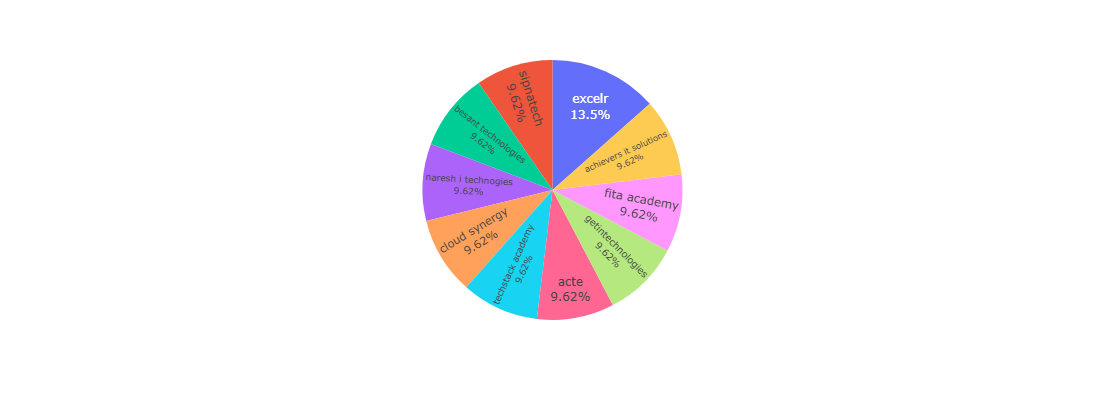


#######################################################
Taken Categorical Column: Location
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['bangalore' 'hyderabad']

Value Counts (FD) of each Category:
Location
bangalore    113
hyderabad    104
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Location
bangalore   52.07
hyderabad   47.93
Name: count, dtype: float64

Mode: bangalore

Visual - Pie Chart:

Top Catgeories:


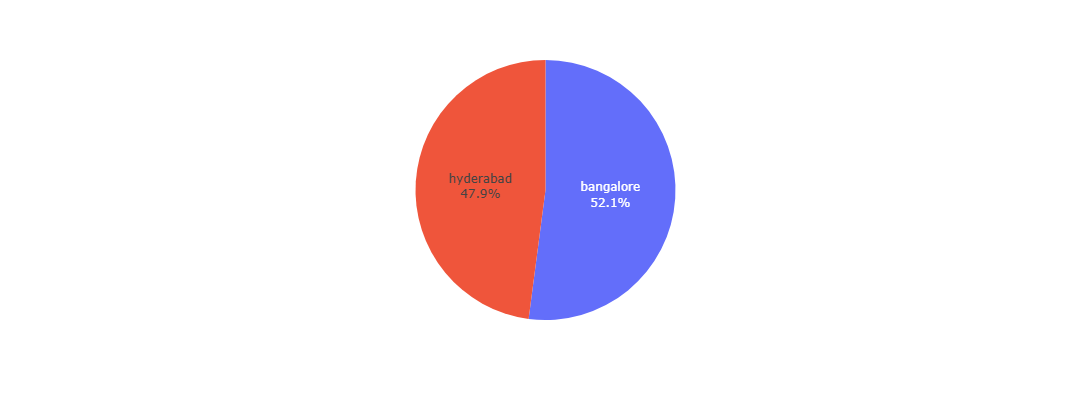


#######################################################
Taken Categorical Column: CourseName
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 8
Category Names:
['datascience' 'python fullstack' 'java fullstack' 'awsdevops'
 'digitalmarketing' 'python' 'aws' 'java']

Value Counts (FD) of each Category:
CourseName
datascience         48
java fullstack      40
awsdevops           39
python fullstack    34
digitalmarketing    34
python              13
java                 6
aws                  3
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
CourseName
datascience        22.12
java fullstack     18.43
awsdevops          17.97
python fullstack   15.67
digitalmarketing   15.67
python              5.99
java                2.76
aws                 1.38
Name: count, dtype: float64

Mode: datascience

Visual - Pie Chart:

Top Catgeories:


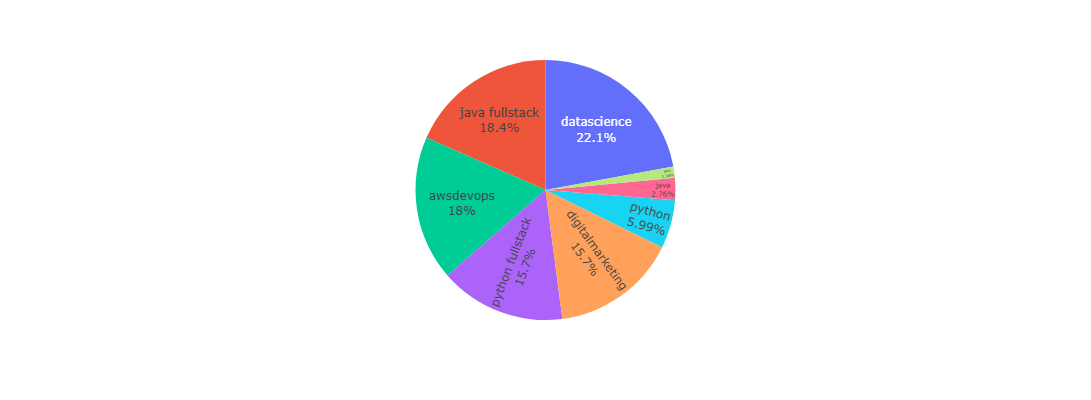


#######################################################
Taken Numeric Continuous Column: CourseFee
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 34962.26
Median: 30000.0
Mode: 30000.0

******** Measures of Dispersion ************
Range: 193000.0
Variance: 592371673.62
Standard Deviation: 24338.69
Five Number Summary:
min     5000.00
25%    20000.00
50%    30000.00
75%    40000.00
max   198000.00
Name: CourseFee, dtype: float64

******** Measures of Symmetry ************
Skewness: 3.35
Kurtosis: 17.34

Visual - Distplot (Histogram + Desnsity plot):



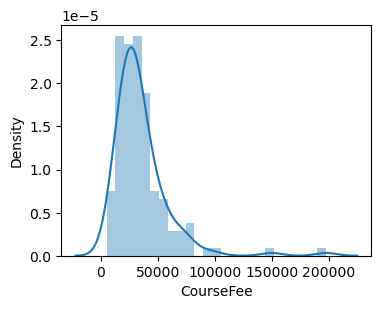

#######################################################
Taken Categorical Column: ModeOfTraining
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 3
Category Names:
['online&offline' 'online' 'offline']

Value Counts (FD) of each Category:
ModeOfTraining
online&offline    197
online             14
offline             6
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
ModeOfTraining
online&offline   90.78
online            6.45
offline           2.76
Name: count, dtype: float64

Mode: online&offline

Visual - Pie Chart:

Top Catgeories:


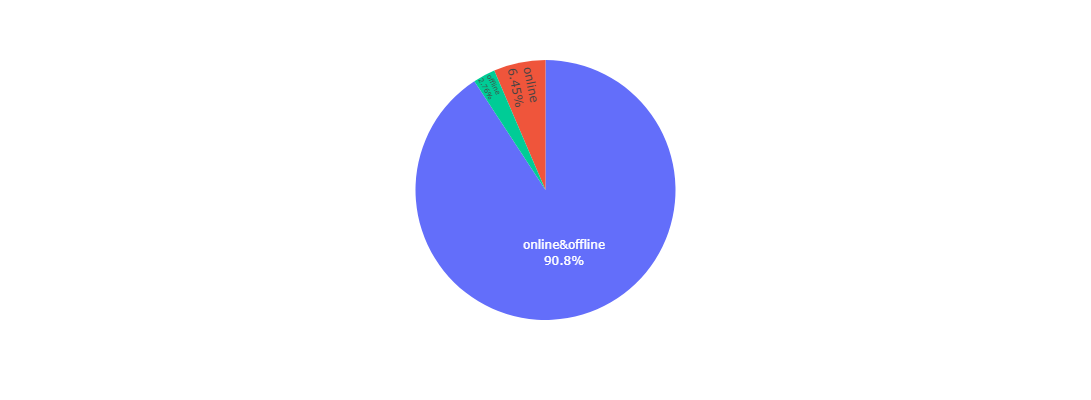


#######################################################
Taken Categorical Column: Certification
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 1
Category Names:
['yes']

Value Counts (FD) of each Category:
Certification
yes    217
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Certification
yes   100.00
Name: count, dtype: float64

Mode: yes

Visual - Pie Chart:

Top Catgeories:


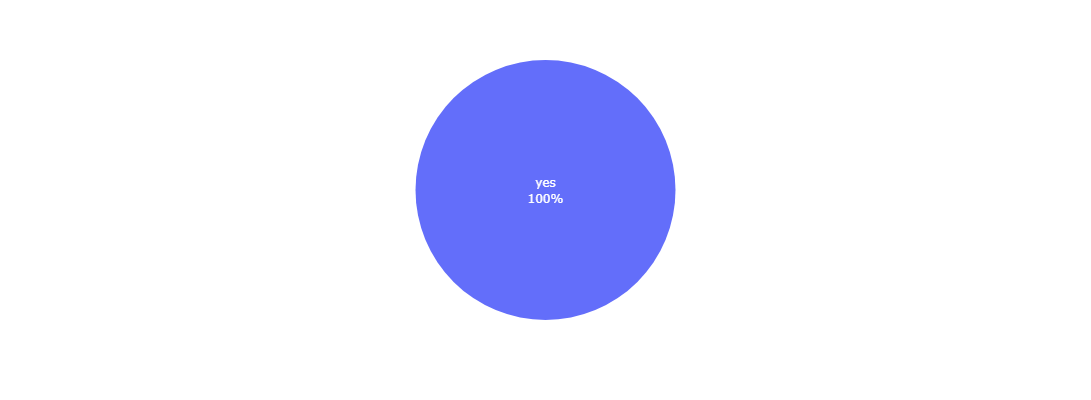


#######################################################
Taken Categorical Column: InternshipIncluded
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['no' 'yes']

Value Counts (FD) of each Category:
InternshipIncluded
no     125
yes     92
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
InternshipIncluded
no    57.60
yes   42.40
Name: count, dtype: float64

Mode: no

Visual - Pie Chart:

Top Catgeories:


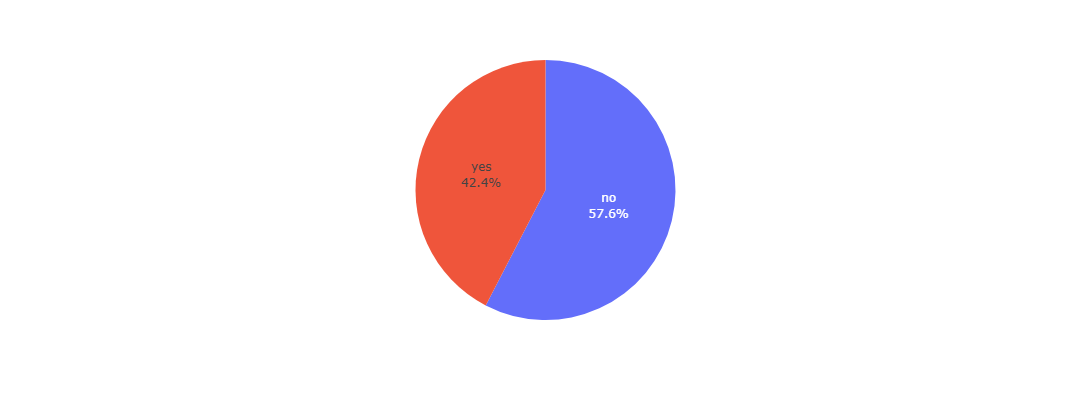


#######################################################
Taken Categorical Column: PlacementAssistance
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['yes' 'no']

Value Counts (FD) of each Category:
PlacementAssistance
yes    212
no       5
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
PlacementAssistance
yes   97.70
no     2.30
Name: count, dtype: float64

Mode: yes

Visual - Pie Chart:

Top Catgeories:


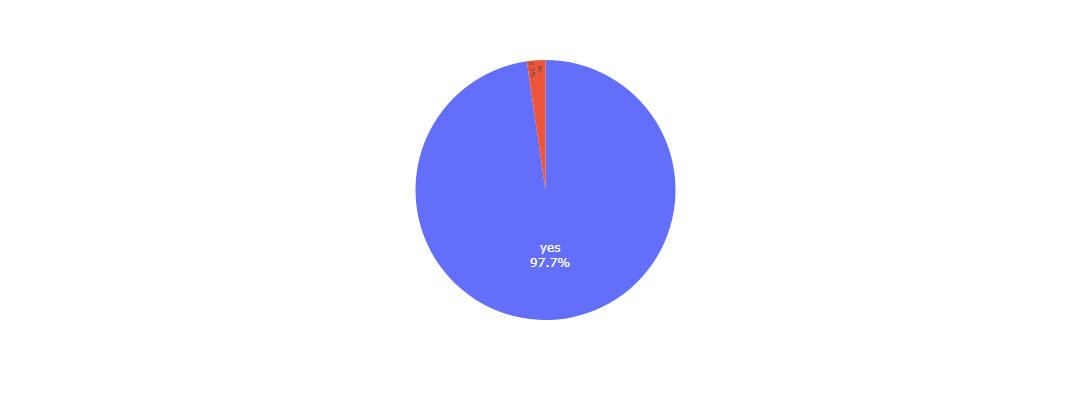


#######################################################
Taken Numeric Continuous Column: NoOfStudents
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 5202.07
Median: 2000.0
Mode: 1000.0

******** Measures of Dispersion ************
Range: 49966.0
Variance: 112976123.62
Standard Deviation: 10629.02
Five Number Summary:
min      34.00
25%    1000.00
50%    2000.00
75%    3238.00
max   50000.00
Name: NoOfStudents, dtype: float64

******** Measures of Symmetry ************
Skewness: 3.58
Kurtosis: 12.39

Visual - Distplot (Histogram + Desnsity plot):



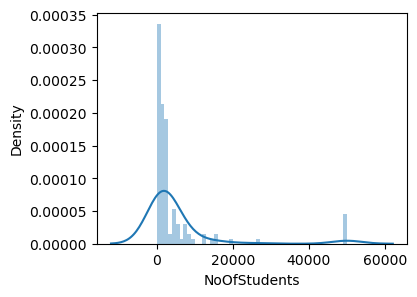

#######################################################
Taken Numeric Continuous Column: Rating
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 4.52
Median: 4.6
Mode: 4.7

******** Measures of Dispersion ************
Range: 2.0
Variance: 0.16
Standard Deviation: 0.4
Five Number Summary:
min   3.00
25%   4.50
50%   4.60
75%   4.70
max   5.00
Name: Rating, dtype: float64

******** Measures of Symmetry ************
Skewness: -1.68
Kurtosis: 3.35

Visual - Distplot (Histogram + Desnsity plot):



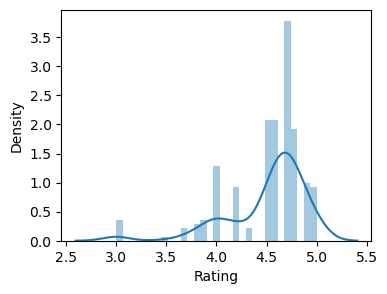

#######################################################
Taken Categorical Column: Discounts
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['no' 'yes']

Value Counts (FD) of each Category:
Discounts
no     119
yes     98
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Discounts
no    54.84
yes   45.16
Name: count, dtype: float64

Mode: no

Visual - Pie Chart:

Top Catgeories:


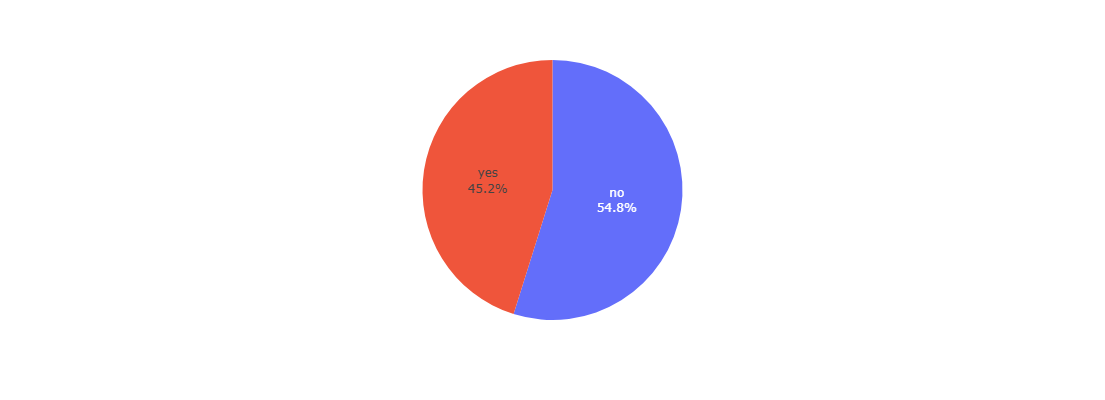

In [92]:
for col in data.columns:
    if data[col].dtype == object:
        uni.catstudy(data, col)
    elif data[col].dtype == 'float64':
        uni.ncstudy(data, col)
    elif data[col].dtype == 'int64':
        uni.ndstudy(data, col)
    elif data[col].dtype == 'datetime64[ns]':
        uni.datestudy(data, col)

**Uni-Variate Insights**
* Excelr provides higher number of courses in different modes in hyderabad and bangalore locations.
* Banglore location have more institutes in data.
* Data Science course is mostly available institutes than other courses.
* Maximum coursefee is 198000 and minimum course fee is 5000 for different courses.
* Maximum institutes provide online&offline classes.
* Every Institute provides certification after course completion.
* Only 42% of institutes provides internship.
* 97% of institutes provides placement assistance.
* Minimum number of students are 34 and maximum number of students are 50000 in different institutes.
* Average rating of institutes is 4.5
* Most of the institutes does not give discounts on coursefee.

**2.2.2 Bi/Multi-Variate Analysis - Study of Data between two or more columns**

**In the Bi/Multi-Variate we have these combinations**

- Descriptive Stats Measures used to study data between two or more columns

**Bi/Multi-Variate Combo**|**Stats Measures**
----|-----------
**Numeric-Numeric...**|**Correlation (-1 to +1)**
**Numeric-Categorical...**|**Aggregation Functions (count, min, max, avg, sum)**
**Categorical-Categorical...**|**FDT**


       - Correlation Coeffiecient Relation Categories

                    0.75 to 1 - Strong Correlation
                    0.50 to 0.75 - Moderate Correlation
                    <0.50 - Weak Correlation
                
- Visualizations
    - Pure Numeric: Relations: Scatter/Heatmaps
    - Pure Categorical: Composition: Pie/Stacked BarCharts
    - Mixed: Composition: Pie/Stacked Barcharts
    
    * Apart from above combos we have other
        - Date: Trends Over time: LineCharts/Area Charts
        - Locations: GeoSpatial: Choropleth maps

**Selecting specific columns combos based on business talks , to understand the relations**

In [98]:
data.head(2)

,InstituteName,Location,CourseName,CourseFee,ModeOfTraining,Certification,InternshipIncluded,PlacementAssistance,NoOfStudents,Rating,Discounts
0,besant technologies,bangalore,datascience,35000.00,online&offline,yes,no,yes,2245.00,4.00,no
1,besant technologies,bangalore,python fullstack,40200.00,online&offline,yes,no,yes,2245.00,4.00,no


Pure Numeric|Mixed Columns|Pure Categorical
----|----|---
CourseFee vs No.of Students|CourseName vs CourseFee|InstituteName vs Certification
CourseFee vs Rating|CourseName vs NoOfStudents|InstituteName vs InternshipIncluded
NoOfStudents vs Rating|ModeOfTraining vs CourseFee|InstituteName vs PlacementAssistance
-|InstituteName vs Rating|InstituteName vs ModeOfTraining
-|-|InstituteName vs Discounts


                                                                 Bi-Variate Analysis

**Pure Numeric**
   * **Descriptive Stats** 

In [102]:
# correlation cofficient

print("CourseFee vs NoOfStudents")

display(round(data[['CourseFee', 'NoOfStudents']].corr(),2))

CourseFee vs NoOfStudents


,CourseFee,NoOfStudents
CourseFee,1.00,-0.03
NoOfStudents,-0.03,1.00


* **Visual**

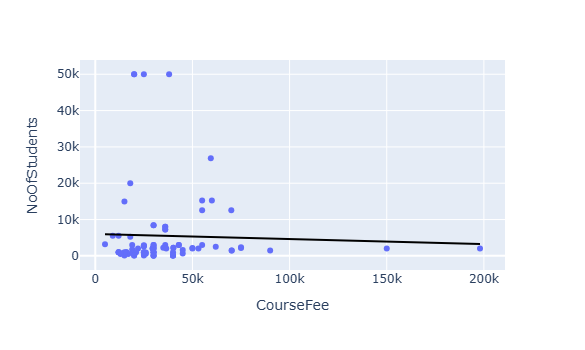

<Figure size 400x300 with 0 Axes>

In [104]:
plt.figure(figsize=(4, 3))
px.scatter(data, x='CourseFee', y='NoOfStudents', trendline='ols', trendline_color_override='black', width=600, height=350)

# data between two columns was shown in points in x & y axes

<Figure size 400x300 with 0 Axes>

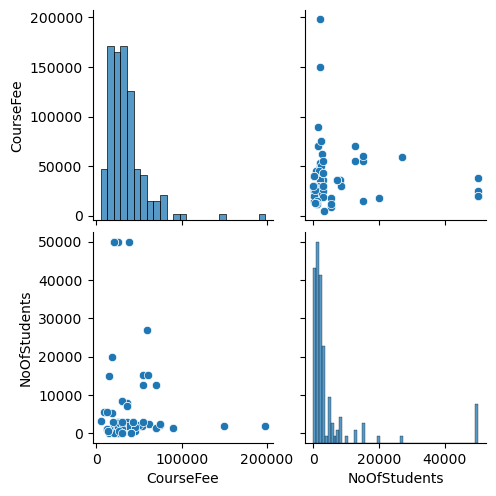

In [105]:
plt.figure(figsize=(4, 3))
sns.pairplot(data[['CourseFee', 'NoOfStudents']])

Insights:
* The data shows that there is a weak negative correlation between CourseFee vs NoOfStudents

In [107]:
# correlation cofficient

print("CourseFee vs Rating")

display(round(data[['CourseFee', 'Rating']].corr(),2))

CourseFee vs Rating


,CourseFee,Rating
CourseFee,1.00,-0.06
Rating,-0.06,1.00


* **Visual**

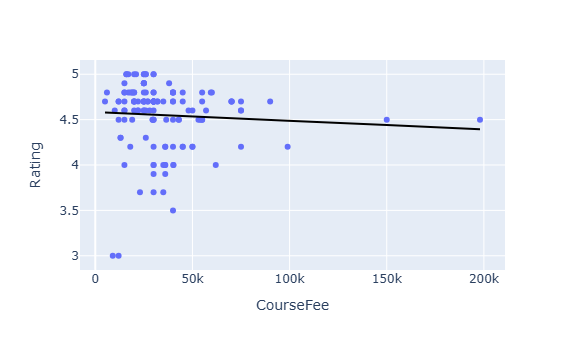

<Figure size 400x300 with 0 Axes>

In [109]:
plt.figure(figsize=(4, 3))
px.scatter(data, x='CourseFee', y='Rating', trendline='ols', trendline_color_override='black', width=600, height=350)

# data between two columns was shown in points in x & y axes

<Figure size 400x300 with 0 Axes>

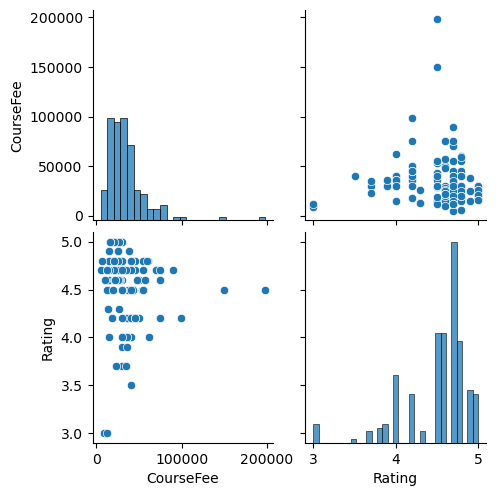

In [110]:
plt.figure(figsize=(4, 3))
sns.pairplot(data[['CourseFee','Rating']])

* Insights
   * The data shows that there is a weak negative correlation between CourseFee vs Rating

**Mixed**
   * Desc Stats

In [1]:
# We can use pandas groupby to get aggregation values of each class

print("CourseName vs CourseFee:")

display(round(data.groupby('CourseName')['CourseFee'].min().sort_values(ascending=False), 2))

CourseName vs CourseFee:


NameError: name 'data' is not defined

**Visual**

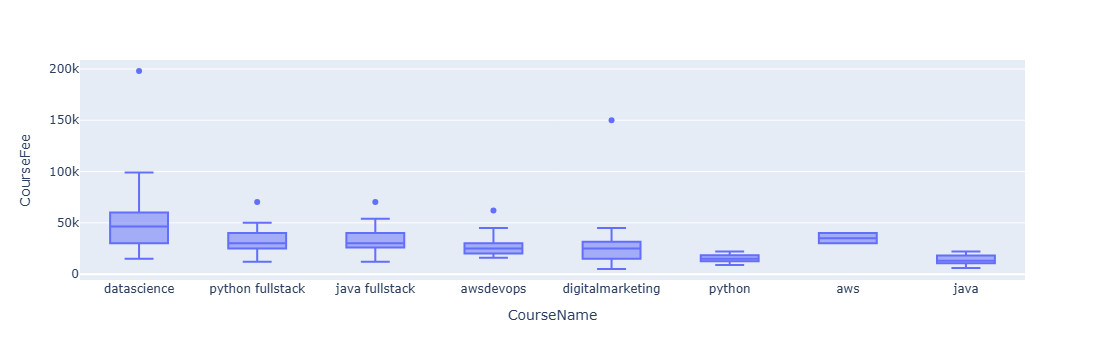

In [239]:
px.box(data,x='CourseName',y='CourseFee')

* Insights:
   * DataScience course fee is higher than other courses 

In [241]:
# We can use pandas groupby to get aggregation values of each class

print("InstituteName vs NoOfStudents:")

display(round(data.groupby('InstituteName')['NoOfStudents'].sum().sort_values(ascending=False)[0:10], 2))

InstituteName vs NoOfStudents:


InstituteName
digital edify            250000.00
datahill solutions        50000.00
datamites                 46840.00
excelr                    45426.00
achievers it solutions    35000.00
techstack academy         32839.00
acte                      32165.00
fita academy              24874.00
apponix                   15000.00
infocampus                15000.00
Name: NoOfStudents, dtype: float64

* **Visual**

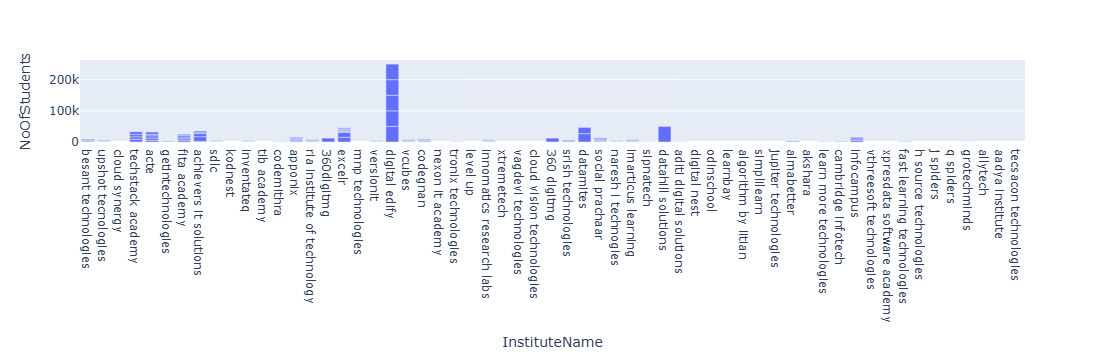

In [235]:
px.bar(data, x='InstituteName', y="NoOfStudents")

* Insights
   * DigitalEdify institute have more number of students  

**Pure Categorical**
   * Descriptive Stats 

In [231]:
# We can use crosstab function in pandas to get FDT (Frequency Distribution Table) of each class

print("InstituteName vs Certification:")

display(pd.crosstab(data['InstituteName'], data['Certification'], margins=True))

InstituteName vs Certification:


Certification,yes,All
InstituteName,,
360 digitmg,1,1
360digitmg,1,1
aadya institute,2,2
achievers it solutions,5,5
acte,5,5
aditi digital solutions,5,5
akshara,3,3
algorithm by iitian,5,5
allytech,3,3


* Insights
   * Every Institute provides certificate for every course after completion of course.

                                                            Multi-Variate Analysis

**Pure Numeric**
   * Descriptive Stats

In [126]:
data.head()

,InstituteName,Location,CourseName,CourseFee,ModeOfTraining,Certification,InternshipIncluded,PlacementAssistance,NoOfStudents,Rating,Discounts
0,besant technologies,bangalore,datascience,35000.00,online&offline,yes,no,yes,2245.00,4.00,no
1,besant technologies,bangalore,python fullstack,40200.00,online&offline,yes,no,yes,2245.00,4.00,no
2,besant technologies,bangalore,java fullstack,40200.00,online&offline,yes,no,yes,2245.00,4.00,no
3,besant technologies,bangalore,awsdevops,62000.00,online&offline,yes,no,yes,2500.00,4.00,no
4,besant technologies,bangalore,digitalmarketing,15000.00,online&offline,yes,no,yes,NaN,4.00,no


In [127]:
data.corr(numeric_only=True)

,CourseFee,NoOfStudents,Rating
CourseFee,1.00,-0.03,-0.06
NoOfStudents,-0.03,1.00,0.08
Rating,-0.06,0.08,1.00


* **Visual**

<Axes: >

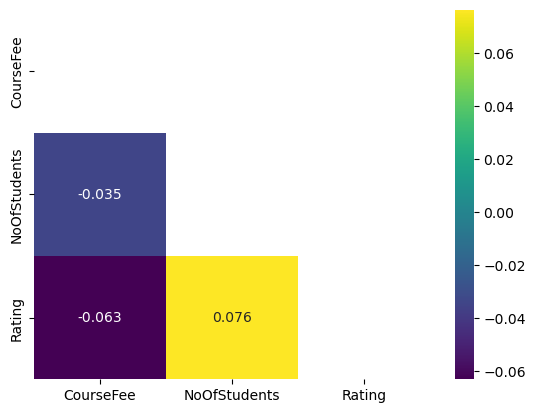

In [129]:
lower = np.triu(data.corr(numeric_only=True))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis', mask=lower)

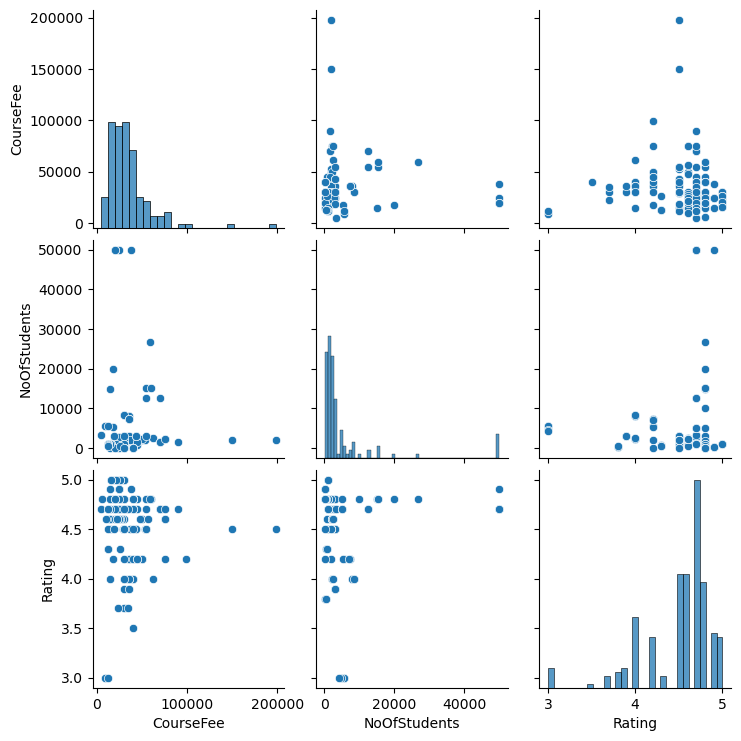

In [130]:
sns.pairplot(data)

* Insights
   * No strong correlations found between numeric columns 

**Mixed**
   * Desc Stats

In [133]:
round(data.groupby(['CourseName', 'ModeOfTraining'])[['CourseFee', 'NoOfStudents']].mean(), 2)

CourseFee  NoOfStudents
CourseName       ModeOfTraining                         
aws              offline          30000.00           NaN
                 online&offline   40000.00       1000.00
awsdevops        online&offline   27614.55       4037.04
datascience      offline          47499.50      15213.00
                 online           89199.60       5324.00
                 online&offline   45427.81       7459.78
digitalmarketing online           79999.67       2000.00
                 online&offline   20928.50       5079.33
java             online&offline   13989.60        560.00
java fullstack   offline          31999.50           NaN
                 online           28000.00       1017.00
                 online&offline   34430.87       4911.78
python           offline               NaN           NaN
                 online&offline   15374.75       6048.25
python fullstack online           26999.50       2000.00
                 online&offline   32645.50       4924.28

* **Visual**

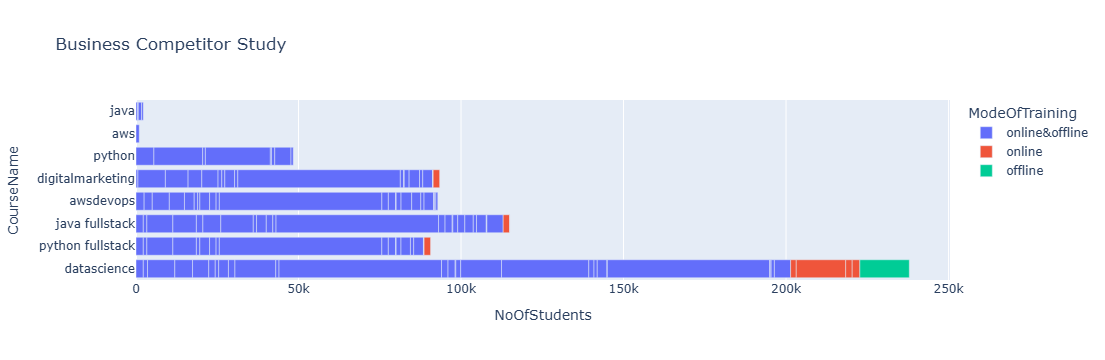

In [135]:
px.bar(data,
       x="NoOfStudents",
       y="CourseName",
       color='ModeOfTraining',
       hover_data=["CourseFee", "NoOfStudents"],
       height=400,
       title='Business Competitor Study')

Insights:
* Most of the institutes have online&offline classes.

**Pure Categorical**
   * Desc Stats

In [138]:
pd.crosstab(data.Location, [data['CourseName'], data['ModeOfTraining']])

CourseName         aws                     awsdevops datascience         \
ModeOfTraining offline online&offline online&offline     offline online   
Location                                                                  
bangalore            1              2             19           2      3   
hyderabad            0              0             20           0      2   

CourseName                    digitalmarketing                          java  \
ModeOfTraining online&offline           online online&offline online&offline   
Location                                                                       
bangalore                  18                2             13              6   
hyderabad                  23                1             18              0   

CourseName     java fullstack                        python                 \
ModeOfTraining        offline online online&offline offline online&offline   
Location                                                                     
bangalore                   2      2             16       1             11   
hyderabad                   0      1             19       0              1   

CourseName     python fullstack                 
ModeOfTraining           online online&offline  
Location                                        
bangalore                     2             13  
hyderabad                     1             18

**Overall Insights On Dataset**

* **Single Column Study:**

  * Excelr provides higher number of courses in different modes in hyderabad and bangalore locations.
  * Banglore location have more institutes in data.
  * Data Science course is mostly available institutes than other courses.
  * Maximum coursefee is 198000 and minimum course fee is 5000 for different courses.
  * Maximum institutes provide online&offline classes.
  * Every Institute provides certification after course completion.
  * Only 42% of institutes provides internship.
  * 97% of institutes provides placement assistance.
  * Minimum number of students are 34 and maximum number of students are 50000 in different institutes.
  * Average rating of institutes is 4.5
  * Most of the institutes does not give discounts on coursefee.
* **Study of Data between two or more columns**
  * No strong correlations found between numeric columns
      - The data shows that there is a weak negative correlation between CourseFee vs NoOfStudents and CourseFee vs Rating
  * DataScience course fee is higher than other courses
  * Digital edify institute have more number of students